# Named Entity Recognition for Aviation Accident Narratives

**Objective**: Extract named entities (aircraft, locations, organizations, dates) from accident narratives using spaCy NER.

**Methods**: spaCy NER, entity validation, frequency analysis

**Date**: 2025-11-08

In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
nlp = spacy.load('en_core_web_sm')
print('✅ Libraries and spaCy model loaded')

✅ Libraries and spaCy model loaded


In [2]:
df = pd.read_parquet('../../data/narratives_dataset.parquet')
df['full_narrative'] = (df['narr_accp'].fillna('') + ' ' + df['narr_cause'].fillna('')).str.strip()
df = df[df['full_narrative'].str.len() > 0].reset_index(drop=True)
print(f'✅ Loaded {len(df):,} narratives')

✅ Loaded 67,126 narratives


In [3]:
# Extract entities from sample (first 10,000 for speed)
sample_size = 10000
sample_df = df.sample(n=min(sample_size, len(df)), random_state=42)

print(f'🔄 Extracting entities from {len(sample_df):,} narratives...')
entities_list = []

for idx, row in sample_df.iterrows():
    doc = nlp(row['full_narrative'][:1000])  # Limit to 1000 chars for speed
    for ent in doc.ents:
        if ent.label_ in ['ORG', 'GPE', 'LOC', 'DATE', 'TIME', 'PRODUCT', 'FAC']:
            entities_list.append({
                'ev_id': row['ev_id'],
                'entity_text': ent.text,
                'entity_label': ent.label_,
                'ev_year': row['ev_year']
            })

entities_df = pd.DataFrame(entities_list)
print(f'✅ Extracted {len(entities_df):,} entities')

🔄 Extracting entities from 10,000 narratives...


✅ Extracted 80,875 entities


In [4]:
# Entity statistics
print('Entity Type Distribution:\n')
print(entities_df['entity_label'].value_counts())

# Top entities by type
for entity_type in ['ORG', 'GPE', 'LOC']:
    print(f'\nTop 10 {entity_type} entities:')
    top_entities = entities_df[entities_df['entity_label'] == entity_type]['entity_text'].value_counts().head(10)
    print(top_entities.to_string())

Entity Type Distribution:

entity_label
GPE        27605
ORG        26401
DATE       15836
FAC         4788
TIME        3194
LOC         1723
PRODUCT     1328
Name: count, dtype: int64

Top 10 ORG entities:
entity_text
CFR                                         3512
Cessna                                      1462
NTSB                                         900
FAA                                          763
VFR                                          665
Federal Aviation Administration              349
CFI                                          345
the National Transportation Safety Board     331
Boeing                                       239
ACCIDENT                                     227

Top 10 GPE entities:
entity_text
California    1267
Alaska        1222
Texas          984
Florida        931
Arizona        474
Colorado       400
Washington     368
Georgia        340
Michigan       302
Illinois       294

Top 10 LOC entities:
entity_text
Pacific               503
Pacific

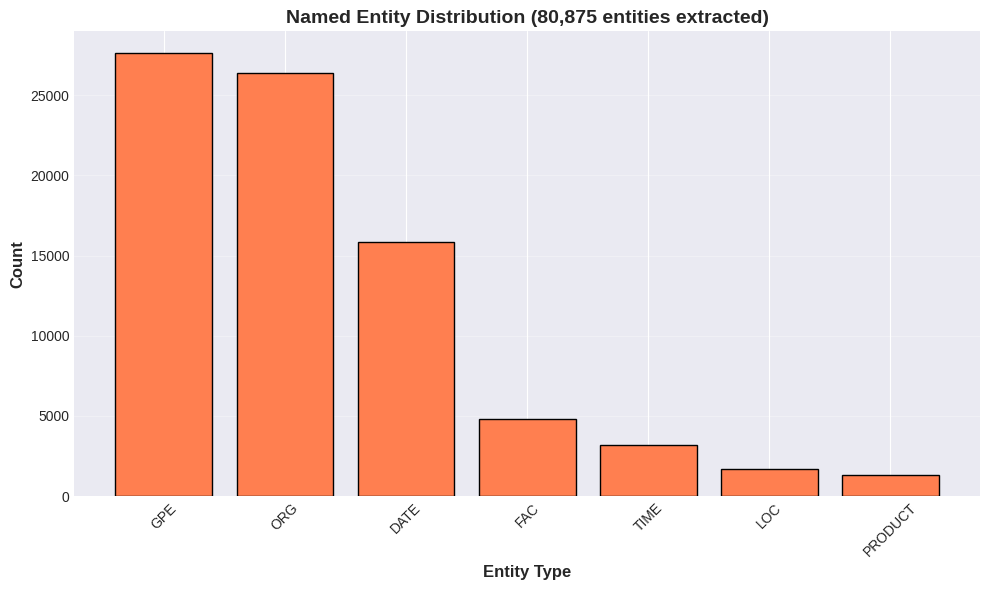

✅ Entity distribution plot saved


In [5]:
# Visualize entity distribution
entity_counts = entities_df['entity_label'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(entity_counts.index, entity_counts.values, color='coral', edgecolor='black')
plt.xlabel('Entity Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title(f'Named Entity Distribution ({len(entities_df):,} entities extracted)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/ner_entity_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Entity distribution plot saved')

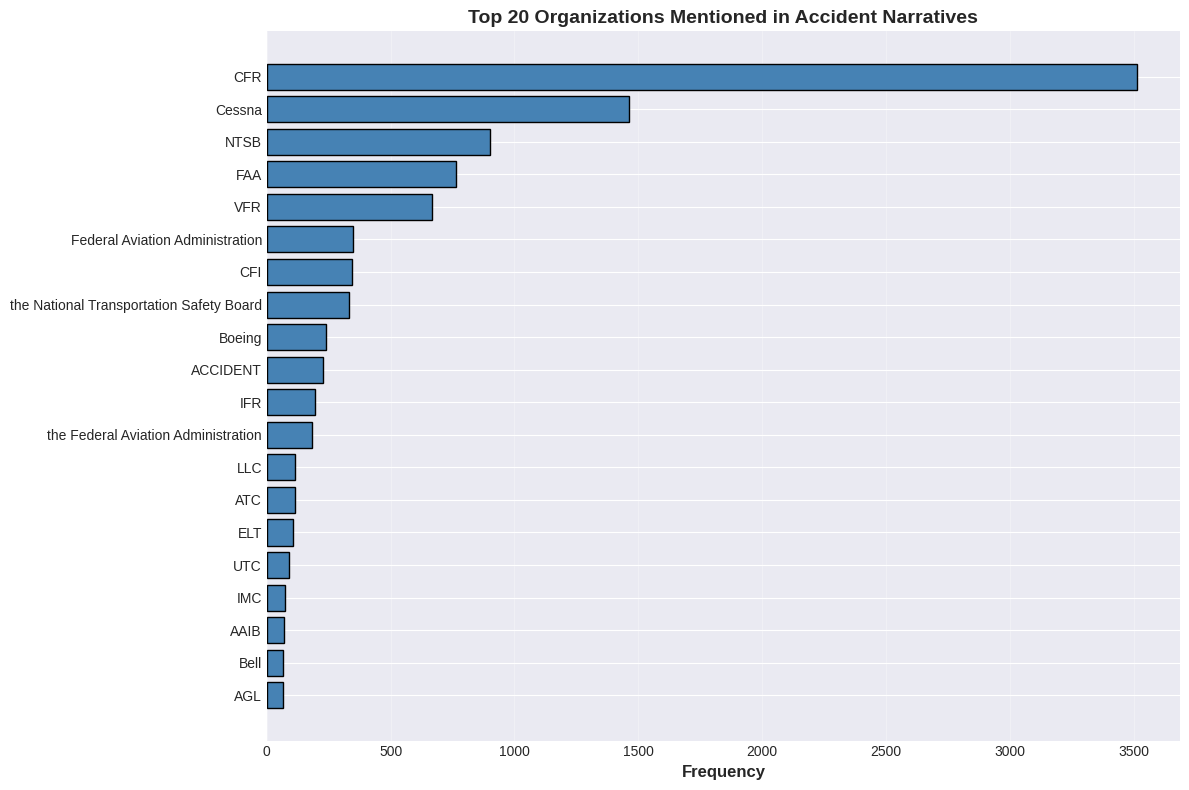

✅ Top organizations plot saved


In [6]:
# Top organizations (airports, agencies, etc.)
top_orgs = entities_df[entities_df['entity_label'] == 'ORG']['entity_text'].value_counts().head(20)

plt.figure(figsize=(12, 8))
plt.barh(range(20), top_orgs.values, color='steelblue', edgecolor='black')
plt.yticks(range(20), top_orgs.index, fontsize=10)
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 20 Organizations Mentioned in Accident Narratives', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/ner_top_organizations.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Top organizations plot saved')

In [7]:
# Export entities
entities_df.to_csv('../../data/ner_extracted_entities.csv', index=False)
print('✅ Entities exported to: data/ner_extracted_entities.csv')

print('\n='*70)
print('NAMED ENTITY RECOGNITION SUMMARY')
print('='*70)
print(f'Narratives analyzed: {len(sample_df):,}')
print(f'Total entities extracted: {len(entities_df):,}')
print(f'Unique entities: {entities_df["entity_text"].nunique():,}')
print(f'Entity types: {entities_df["entity_label"].nunique()}')
print('\n✅ NER analysis complete!')
print('='*70)

✅ Entities exported to: data/ner_extracted_entities.csv

=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
NAMED ENTITY RECOGNITION SUMMARY
Narratives analyzed: 10,000
Total entities extracted: 80,875
Unique entities: 27,585
Entity types: 7

✅ NER analysis complete!
